<a href="https://colab.research.google.com/github/AhmedWael2000/Image-compression-with-PCA/blob/main/PCA_Image_Compression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def PCA(channel,k):


  # centering the image
  X_mean = np.mean(channel, axis=0)
  X_centered = channel - X_mean

  # Apply PCA

  cov_matrix = np.cov(X_centered)
  eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
  idx = eigen_values.argsort()[::-1]
  eigen_values = eigen_values[idx]
  eigen_vectors = eigen_vectors[:, idx]

  # get the first k eigen vectors
  U_reduce = eigen_vectors[:, :k]
  Z = np.matmul(U_reduce.T,X_centered)
  # Reconstruct the compressed image
  X_approx = np.matmul( U_reduce, Z) + X_mean
  return  X_approx


# Reading Image

In [ ]:
pic = cv2.imread("/content/alAqsa.jpeg")
gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
reconstructed = PCA(gray,100)
gray.shape

(400, 640)

Compressing Gray Image

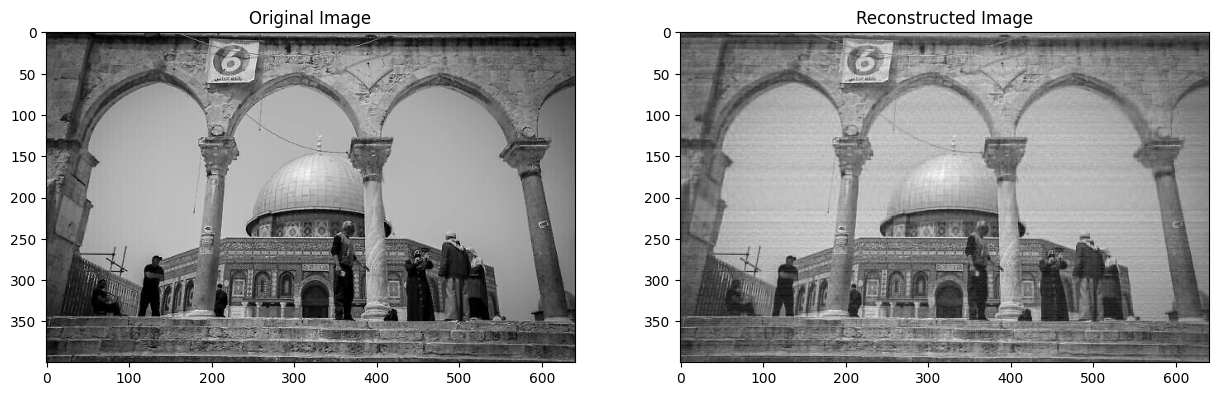

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
fig.add_subplot(122)
plt.title("Reconstructed Image")
plt.imshow(reconstructed, cmap='gray');

#Compressing RGB Image

In [ ]:
flower = cv2.imread("/content/alAqsa.jpeg")
b,g,r=cv2.split(flower)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)
k=200
b = PCA(b,k)/255
g = PCA(g,k)/255
r = PCA(r,k)/255
reduced_image = (cv2.merge((r,g,b)))


# Plotting

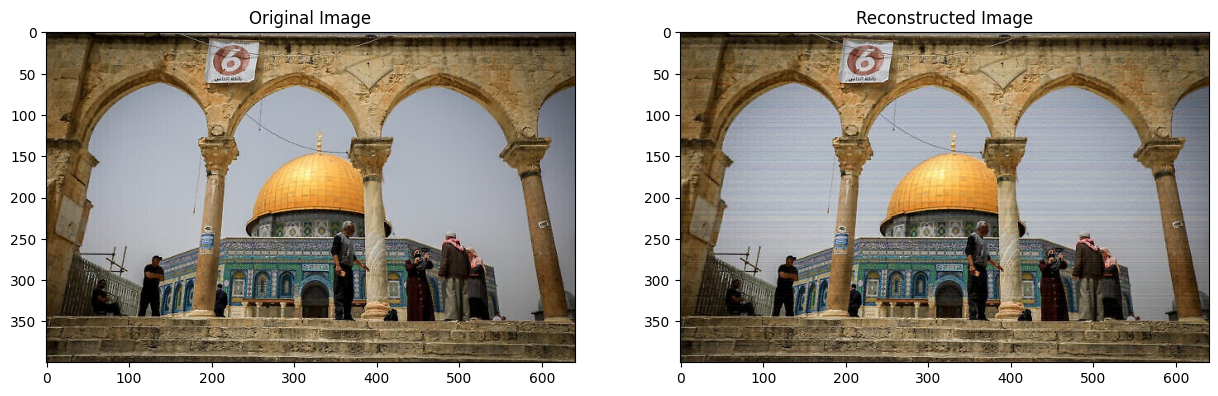

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(flower)
fig.add_subplot(122)
plt.title("Reconstructed Image")
plt.imshow(reduced_image);